In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import os
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_valid, x_train = x_train[:5000], x_train[5000:]
y_valid, y_train = y_train[:5000], y_train[5000:]

In [3]:
stand_scale = StandardScaler()

x_train_trans = stand_scale.fit_transform(x_train.reshape(-1, 1)).reshape(-1, 28, 28)
x_valid_trans = stand_scale.transform(x_valid.reshape(-1, 1)).reshape(-1, 28, 28)
x_test_trans = stand_scale.transform(x_test.reshape(-1, 1)).reshape(-1, 28, 28)

In [4]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
for _ in range(20):
    model.add(keras.layers.Dense(100, activation="relu"))

model.add(keras.layers.Dense(10, activation="softmax"))

In [5]:
model.compile(optimizer=keras.optimizers.SGD(0.001), 
              loss='sparse_categorical_crossentropy', 
              metrics = ["accuracy"])
callbacks = [keras.callbacks.EarlyStopping(patience=5, min_delta=1e-3)]

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_4 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_5 (Dense)              (None, 100)               1

In [7]:
history = model.fit(x_train_trans, y_train, epochs=10, 
          validation_data=(x_valid_trans, y_valid), callbacks=callbacks)

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 9s 157us/sample - loss: 2.3017 - accuracy: 0.1400 - val_loss: 2.3009 - val_accuracy: 0.1924
Epoch 2/10
55000/55000 [==============================] - 7s 136us/sample - loss: 2.2997 - accuracy: 0.1972 - val_loss: 2.2981 - val_accuracy: 0.2508
Epoch 3/10
55000/55000 [==============================] - 8s 138us/sample - loss: 2.2951 - accuracy: 0.2593 - val_loss: 2.2915 - val_accuracy: 0.2986
Epoch 4/10
55000/55000 [==============================] - 8s 147us/sample - loss: 2.2855 - accuracy: 0.3121 - val_loss: 2.2775 - val_accuracy: 0.3332
Epoch 5/10
55000/55000 [==============================] - 9s 158us/sample - loss: 2.2624 - accuracy: 0.3433 - val_loss: 2.2397 - val_accuracy: 0.3446
Epoch 6/10
55000/55000 [==============================] - 8s 139us/sample - loss: 2.1673 - accuracy: 0.3401 - val_loss: 1.9812 - val_accuracy: 0.3252
Epoch 7/10
55000/55000 [===========================

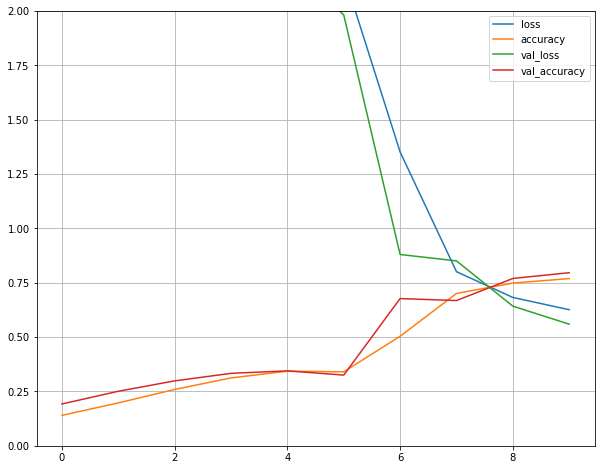

In [8]:
def plt_learning_curve(history):
    pd.DataFrame(history).plot(figsize=(10,8))
    plt.grid(True)
    plt.ylim(0, 2)
    plt.show()
    
plt_learning_curve(history.history)
# 0-5,accurancy,增幅较小
# 原因：1，参数多，训练不充分
#      2，梯度消失 - 链式法则 - 复式函数法f(g(x))=

In [9]:
model.evaluate(x_test_trans, y_test)

10000/10000 [==============================] - 1s 70us/sample - loss: 0.5902 - accuracy: 0.7792


[0.5902305687904358, 0.7792]